In [98]:
import numpy as np
import pandas as pd

In [99]:
data = pd.read_csv("finalFileClass.csv", sep=';')
data.head()

,Unnamed: 0,AAlog_BMI,AGE0_20,AGE20-40,AGE40plus,Gender,rs1004299,rs1004930,rs1008400,rs1033046,...,rs9934504,rs9934800,rs9935401,rs9936365,rs9936385,rs9939609,rs9939973,rs9940128,rs9941349,rs9972796
0,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,1,0,1,0,...,0,0,1,1,1,1,1,1,1,0
2,2,0,0,0,1,0,0,0,0,1,...,0,0,1,1,1,1,0,0,1,0
3,3,0,0,1,0,1,0,0,1,1,...,0,0,1,0,1,1,1,1,1,1
4,4,2,0,1,0,1,1,1,0,1,...,0,0,1,1,1,1,1,1,1,1


In [100]:
data['AGE0_20'].unique()

array([0], dtype=int64)

In [101]:
X = data.iloc[:, 2:]
X = X.drop(columns='AGE20-40')###if age < 40 -> 0
X = X.drop(columns='AGE0_20')###no age < 20
y = data.iloc[:, 1]
X.head()

,AGE40plus,Gender,rs1004299,rs1004930,rs1008400,rs1033046,rs10521300,rs10521307,rs1075440,rs10771951,...,rs9934504,rs9934800,rs9935401,rs9936365,rs9936385,rs9939609,rs9939973,rs9940128,rs9941349,rs9972796
0,1,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,1,1,1,0,...,0,0,1,1,1,1,1,1,1,0
2,1,0,0,0,0,1,0,0,1,1,...,0,0,1,1,1,1,0,0,1,0
3,0,1,0,0,1,1,0,1,1,0,...,0,0,1,0,1,1,1,1,1,1
4,0,1,1,1,0,1,0,1,0,0,...,0,0,1,1,1,1,1,1,1,1


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
y_test = y_test.values

In [103]:
#XGBoost
import xgboost
from xgboost import XGBClassifier

In [104]:
model = XGBClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:
from sklearn.model_selection import GridSearchCV

test_params = {
    'learning_rate':[0.15, 0.1, 0.05],
    'max_depth':[4,8,12]
}

model = GridSearchCV(estimator = model, param_grid = test_params, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
print(model.best_params_)

KeyboardInterrupt: 

In [17]:
model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4)
model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

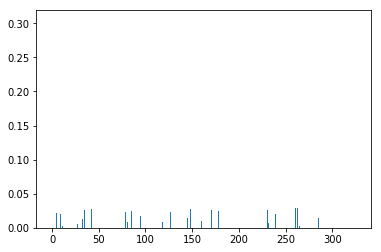

In [105]:
#Feature importance
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

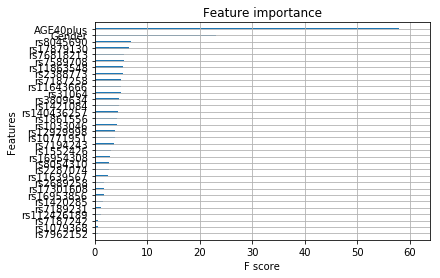

In [106]:
xgboost.plot_importance(model, importance_type="gain", show_values=False)

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 50.13% (3.36%)


In [108]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [109]:
arr = model.feature_importances_
idx = (-arr).argsort()[:12]
idx = idx[2:]
idx

array([275, 123, 263, 261,  42, 148, 231,  35, 171, 178], dtype=int64)

In [144]:
data2 = X

for i in idx:
    data2['{}*AGE'.format(i)] = data2.iloc[:, i] * data2.iloc[:, 0]
for i in idx:
    data2['{}*SEX'.format(i)] = data2.iloc[:, i] * data2.iloc[:, 1]

In [82]:
#X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size = 0.25, random_state = 0)
#y_test = y_test.values

In [83]:
#model = XGBClassifier(n_estimators=100, learning_rate=0.05)
#model.fit(X_train, y_train, early_stopping_rounds=5, 
#             eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [134]:
import itertools
comb = list(itertools.combinations(idx, 2))
for i, j in comb:
    data2['{}*{}'.format(i, j)] = data2.iloc[:, i] * data2.iloc[:, j]

In [135]:
data2 = data2.drop(columns='AGE40plus')
data2.head()

,Gender,rs1004299,rs1004930,rs1008400,rs1033046,rs10521300,rs10521307,rs1075440,rs10771951,rs10771966,...,332*333,332*328,332*340,332*260,333*328,333*340,333*260,328*340,328*260,340*260
0,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size = 0.25, random_state = 0)
y_test = y_test.values

In [137]:
model = XGBClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [138]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 51.44% (2.74%)


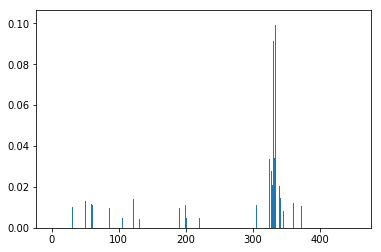

In [139]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [140]:
arr = model.feature_importances_
idx = (-arr).argsort()[:11]
idx = idx[1:]
idx

array([334, 341, 331, 329, 332, 326, 435, 333, 325, 328], dtype=int64)

In [141]:
data2.head()

,Gender,rs1004299,rs1004930,rs1008400,rs1033046,rs10521300,rs10521307,rs1075440,rs10771951,rs10771966,...,332*333,332*328,332*340,332*260,333*328,333*340,333*260,328*340,328*260,340*260
0,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [165]:
indexes = list(data2.columns.values)
snip_list = []
for i in idx:
    snip_list.append(indexes[i])
    


IndexError: list index out of range

In [160]:
snip_list = [171,148,148,261,231,275,329,35,263,263]

In [172]:
FSnipList = []

In [175]:
FSnipList.append(indexes[171])
FSnipList.append(indexes[148])
FSnipList.append(indexes[261])
FSnipList.append(indexes[231])
FSnipList.append(indexes[275])
FSnipList.append(indexes[329])
FSnipList.append(indexes[263])
FSnipList.append('rs9972796')





In [178]:
FSnipList

['rs31064',
 'rs2388773',
 'rs7589708',
 'rs7187258',
 'rs8045690',
 '261*AGE',
 'rs76818213',
 'rs31064',
 'rs2388773',
 'rs7589708',
 'rs7187258',
 'rs8045690',
 '261*AGE',
 'rs76818213',
 'rs9972796']